In [1]:
##Load all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix,accuracy_score
sns.set()#use seaborn plotting style

In [5]:
#Load the dataset
data = fetch_20newsgroups()
#Get the text categories
text_categories=data.target_names
#define the training set
train_data=fetch_20newsgroups(subset="train",categories=text_categories)
#define the test set
test_data=fetch_20newsgroups(subset="train",categories=text_categories)

#Print no.of classes and no.of samples in train and test data

In [8]:
print("We have {} unique classes".format(len(text_categories)))
print("we have {} training samples".format(len(test_data.data)))
print("We have {} test samples".format(len(test_data.data)))

We have 20 unique classes
we have 11314 training samples
We have 11314 test samples


##Visualize any sample data


In [9]:
print(test_data.data[5])

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

##Build the Naive Bayes classifier and finally train the model.To implement it text
##transformation we will use the make_pipeline function. This will internally transform
##the text data and then the model will be fitted using the transformed data.

In [10]:
model=make_pipeline(TfidfVectorizer(),MultinomialNB())

##Train the model using the train data

In [11]:
model.fit(train_data.data,train_data.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

##Predict the categories of the text data

In [12]:
predicted_categories=model.predict(test_data.data)

##Build the multi-class confusion matrix to see if the model is good or if the model
##predicts correctly on specific text categories.

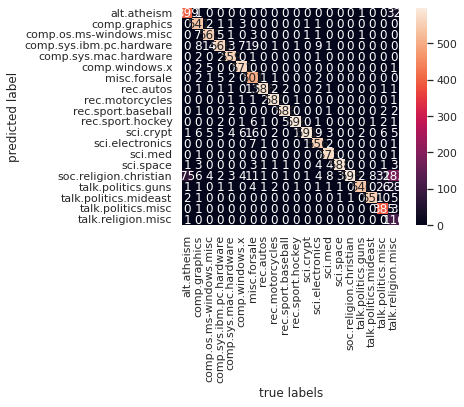

In [19]:
mat = confusion_matrix(test_data.target, predicted_categories)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d",xticklabels=train_data.target_names,yticklabels=train_data.target_names)
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()

##Print the accuracy of the model

In [22]:
print("The accuracy is {}".format(accuracy_score(test_data.target,predicted_categories)))

The accuracy is 0.9326498143892522


##Test model for unseen data

In [21]:
def my_predictions(my_sentence, model):
 all_categories_names = np.array(data.target_names)
 prediction = model.predict([my_sentence])
 return all_categories_names[prediction]
my_sentence=" I am a student"
print(my_predictions(my_sentence,model))

['comp.sys.mac.hardware']
